<a href="https://colab.research.google.com/github/MuriloLopesFrade/Chelleging_Telecom_X/blob/main/Telecom_X_parte_1_vers%C3%A3o_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importação de bibliotecas

In [74]:
# Importando Biblioteca
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

##📌 Extração (E - Extract)

In [75]:
dados = pd.read_json('/content/TelecomX_Data (1).json') #importação do banco de dados

In [76]:
dados

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


##🔧 Transformação (T - Transform)

In [77]:
# Normalizandos as colunas do DataFrame
def columns_normalize(dado,coluna):
  dados_normalizado = pd.json_normalize(dado[coluna])
  return dados_normalizado

custumer = columns_normalize(dados,'customer')
phone = columns_normalize(dados,'phone')
internet = columns_normalize(dados,'internet')
account = columns_normalize(dados,'account')

# Excluindo as colunas não normalizadas do DataFrame
dados = dados.drop(columns=['customer','phone','internet','account'])

# Juntando as colunas normalizadas com o DataFrame
dados = pd.concat([dados,custumer,phone,internet,account],axis=1)

dados


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [78]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [79]:
# Padronizando os nomes das colunas
dados.columns = dados.columns.str.replace('.', '_')

In [80]:
#alterarando o tipo de dados das coluna gasto_total
dados['Charges_Total'] = pd.to_numeric(dados['Charges_Total'], errors='coerce') #tratar os erros existentes nessa coluna
dados[['Charges_Total']] = dados[['Charges_Total']].astype(np.float64) # Converte as colunas para float64

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [81]:
# Verificando valores duplicados
dados_duplicados = dados[dados.duplicated()]
dados_duplicados = dados.duplicated().sum()
print(f'Quantidade de dados duplicados: {dados_duplicados}')

Quantidade de dados duplicados: 0


In [82]:
# Verificando valores nulos
valores_nulos = dados[dados.isnull().any(axis=1)] #verificar se a dados nulos nas colunas
contagem_nulos = dados.isnull().sum() #realizar a contagem desses dados nulos
contagem_nulos

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [83]:
dados.head(976)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,1360-XFJMR,No,Female,0,Yes,No,67,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),109.70,7344.45
972,1363-TXLSL,Yes,Male,1,Yes,No,1,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.30,70.30
973,1370-AQYEM,,Male,0,Yes,Yes,5,Yes,No,Fiber optic,...,No,Yes,No,No,Yes,Month-to-month,Yes,Mailed check,90.35,434.50
974,1370-GGAWX,No,Female,0,No,No,46,Yes,Yes,Fiber optic,...,Yes,Yes,No,No,Yes,One year,Yes,Electronic check,94.15,4408.45


In [84]:
dados = dados.fillna({'Charges_Total': 0, 'Churn': 'Não informado'})

In [85]:
dados.head(976)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,1360-XFJMR,No,Female,0,Yes,No,67,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),109.70,7344.45
972,1363-TXLSL,Yes,Male,1,Yes,No,1,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.30,70.30
973,1370-AQYEM,,Male,0,Yes,Yes,5,Yes,No,Fiber optic,...,No,Yes,No,No,Yes,Month-to-month,Yes,Mailed check,90.35,434.50
974,1370-GGAWX,No,Female,0,No,No,46,Yes,Yes,Fiber optic,...,Yes,Yes,No,No,Yes,One year,Yes,Electronic check,94.15,4408.45


In [86]:
vazios = dados['Churn'].str.strip().eq('') | dados['Churn'].isna()
dados['Churn'] = dados['Churn'].replace(r'^\s*$', np.nan, regex=True)

In [87]:
dados.head(976)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,1360-XFJMR,No,Female,0,Yes,No,67,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),109.70,7344.45
972,1363-TXLSL,Yes,Male,1,Yes,No,1,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.30,70.30
973,1370-AQYEM,NaN,Male,0,Yes,Yes,5,Yes,No,Fiber optic,...,No,Yes,No,No,Yes,Month-to-month,Yes,Mailed check,90.35,434.50
974,1370-GGAWX,No,Female,0,No,No,46,Yes,Yes,Fiber optic,...,Yes,Yes,No,No,Yes,One year,Yes,Electronic check,94.15,4408.45


In [88]:
dados['Churn'] = dados['Churn'].bfill()
dados.head(976)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,1360-XFJMR,No,Female,0,Yes,No,67,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),109.70,7344.45
972,1363-TXLSL,Yes,Male,1,Yes,No,1,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.30,70.30
973,1370-AQYEM,No,Male,0,Yes,Yes,5,Yes,No,Fiber optic,...,No,Yes,No,No,Yes,Month-to-month,Yes,Mailed check,90.35,434.50
974,1370-GGAWX,No,Female,0,No,No,46,Yes,Yes,Fiber optic,...,Yes,Yes,No,No,Yes,One year,Yes,Electronic check,94.15,4408.45


In [89]:
# Traduzindo os nomes das colunas
traducao_nome_colunas = {
    'customerID': 'ID_Cliente',
    'Churn': 'Cancelado',
    'gender': 'Gênero',
    'SeniorCitizen': 'idoso',
    'Partner': 'Parceiro',
    'Dependents': 'Dependentes',
    'tenure': 'Meses_Contrato',
    'PhoneService': 'Serviço_Telefone',
    'MultipleLines': 'Mutiplas_Linhas',
    'InternetService': 'Provedor_Internet',
    'OnlineSecurity': 'Segurança_Online',
    'OnlineBackup': 'Backup_Online',
    'DeviceProtection': 'Proteção_Dispocitivo',
    'TechSupport': 'Suporte_Técnico',
    'StreamingTV': 'Tv_a_cabo',
    'StreamingMovies': 'Streaming_Filmes',
    'Contract': 'Tipo_Contrato',
    'PaperlessBilling': 'Fatura_Online',
    'PaymentMethod': 'Tipo_Pagamento',
    'Charges_Monthly': 'Gasto_Mensal',
    'Charges_Total': 'Gasto_Total'
}

dados = dados.rename(columns=traducao_nome_colunas)

In [90]:
dados.columns.tolist()

['ID_Cliente',
 'Cancelado',
 'Gênero',
 'idoso',
 'Parceiro',
 'Dependentes',
 'Meses_Contrato',
 'Serviço_Telefone',
 'Mutiplas_Linhas',
 'Provedor_Internet',
 'Segurança_Online',
 'Backup_Online',
 'Proteção_Dispocitivo',
 'Suporte_Técnico',
 'Tv_a_cabo',
 'Streaming_Filmes',
 'Tipo_Contrato',
 'Fatura_Online',
 'Tipo_Pagamento',
 'Gasto_Mensal',
 'Gasto_Total']

In [91]:
# Verificando valores nulos
valores_nulos = dados[dados.isnull().any(axis=1)]
contagem_nulos = dados.isnull().sum()
contagem_nulos

,0
ID_Cliente,0
Cancelado,0
Gênero,0
idoso,0
Parceiro,0
Dependentes,0
Meses_Contrato,0
Serviço_Telefone,0
Mutiplas_Linhas,0
Provedor_Internet,0


In [92]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Cliente            7267 non-null   object 
 1   Cancelado             7267 non-null   object 
 2   Gênero                7267 non-null   object 
 3   idoso                 7267 non-null   int64  
 4   Parceiro              7267 non-null   object 
 5   Dependentes           7267 non-null   object 
 6   Meses_Contrato        7267 non-null   int64  
 7   Serviço_Telefone      7267 non-null   object 
 8   Mutiplas_Linhas       7267 non-null   object 
 9   Provedor_Internet     7267 non-null   object 
 10  Segurança_Online      7267 non-null   object 
 11  Backup_Online         7267 non-null   object 
 12  Proteção_Dispocitivo  7267 non-null   object 
 13  Suporte_Técnico       7267 non-null   object 
 14  Tv_a_cabo             7267 non-null   object 
 15  Streaming_Filmes     

In [93]:
# Criando e calculando os valores da coluna 'Contas_diarias'
dados['Contas_Diarias'] = dados['Gasto_Mensal'] / 30

In [94]:
dados

,ID_Cliente,Cancelado,Gênero,idoso,Parceiro,Dependentes,Meses_Contrato,Serviço_Telefone,Mutiplas_Linhas,Provedor_Internet,...,Proteção_Dispocitivo,Suporte_Técnico,Tv_a_cabo,Streaming_Filmes,Tipo_Contrato,Fatura_Online,Tipo_Pagamento,Gasto_Mensal,Gasto_Total,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


In [95]:
# Traduzindo os valores das colunas
traducao_valor_binario = {
    'No': 'Não',
    'Yes': 'Sim'
    }

traducao_idoso = {
    0: 'Não',
    1: 'Sim'
    }
traducao_genero = {
    'Female': 'Feminino',
    'Male': 'Masculino'
}

traducao_tipo_pagamento = {
    'Mailed check': 'Cheque por correio',
    'Electronic check': 'Cheque eletrônico',
    'Bank transfer (automatic)': 'Transferência bancária (automática)',
     'Credit card (automatic)': 'Cartão de crédito (automático)'
}

traducao_tempo_pagemento = {'Month-to-month': 'Mês a mês', 'One year': 'Um ano', 'Two year': 'Dois anos'}

traducao_mutiplas_Linhas = {'No phone service': 'Sem serviço telefônico', 'No': 'Não', 'Yes': 'Sim'}

traducao_provedor_Internet = {'DSL': 'DSL', 'Fiber optic': 'Fibra ótica', 'No': 'Não'}

traducao_backup_online_segurança_online = {'No internet service': 'Sem esse serviço ', 'No': 'Não', 'Yes': 'Sim'}

dados['Cancelado'] = dados['Cancelado'].replace(traducao_valor_binario)
dados['idoso'] = dados['idoso'].replace(traducao_idoso)
dados['Gênero'] = dados['Gênero'].replace(traducao_genero)
dados['Parceiro'] = dados['Parceiro'].replace(traducao_valor_binario)
dados['Dependentes'] = dados['Dependentes'].replace(traducao_valor_binario)
dados['Serviço_Telefone'] = dados['Serviço_Telefone'].replace(traducao_valor_binario)
dados['Mutiplas_Linhas'] = dados['Mutiplas_Linhas'].replace(traducao_mutiplas_Linhas)
dados['Provedor_Internet'] = dados['Provedor_Internet'].replace(traducao_provedor_Internet)
dados['Segurança_Online'] = dados['Segurança_Online'].replace(traducao_backup_online_segurança_online)
dados['Backup_Online'] = dados['Backup_Online'].replace(traducao_backup_online_segurança_online)
dados['Proteção_Dispocitivo'] = dados['Proteção_Dispocitivo'].replace(traducao_backup_online_segurança_online)
dados['Suporte_Técnico'] = dados['Suporte_Técnico'].replace(traducao_backup_online_segurança_online)
dados['Tv_a_cabo'] = dados['Tv_a_cabo'].replace(traducao_backup_online_segurança_online)
dados['Streaming_Filmes'] = dados['Streaming_Filmes'].replace(traducao_backup_online_segurança_online)
dados['Tipo_Contrato'] = dados['Tipo_Contrato'].replace(traducao_tempo_pagemento)
dados['Fatura_Online'] = dados['Fatura_Online'].replace(traducao_valor_binario)
dados['Tipo_Pagamento'] = dados['Tipo_Pagamento'].replace(traducao_tipo_pagamento)
dados

,ID_Cliente,Cancelado,Gênero,idoso,Parceiro,Dependentes,Meses_Contrato,Serviço_Telefone,Mutiplas_Linhas,Provedor_Internet,...,Proteção_Dispocitivo,Suporte_Técnico,Tv_a_cabo,Streaming_Filmes,Tipo_Contrato,Fatura_Online,Tipo_Pagamento,Gasto_Mensal,Gasto_Total,Contas_Diarias
0,0002-ORFBO,Não,Feminino,Não,Sim,Sim,9,Sim,Não,DSL,...,Não,Sim,Sim,Não,Um ano,Sim,Cheque por correio,65.60,593.30,2.186667
1,0003-MKNFE,Não,Masculino,Não,Não,Não,9,Sim,Sim,DSL,...,Não,Não,Não,Sim,Mês a mês,Não,Cheque por correio,59.90,542.40,1.996667
2,0004-TLHLJ,Sim,Masculino,Não,Não,Não,4,Sim,Não,Fibra ótica,...,Sim,Não,Não,Não,Mês a mês,Sim,Cheque eletrônico,73.90,280.85,2.463333
3,0011-IGKFF,Sim,Masculino,Sim,Sim,Não,13,Sim,Não,Fibra ótica,...,Sim,Não,Sim,Sim,Mês a mês,Sim,Cheque eletrônico,98.00,1237.85,3.266667
4,0013-EXCHZ,Sim,Feminino,Sim,Sim,Não,3,Sim,Não,Fibra ótica,...,Não,Sim,Sim,Não,Mês a mês,Sim,Cheque por correio,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,Não,Feminino,Não,Não,Não,13,Sim,Não,DSL,...,Não,Sim,Não,Não,Um ano,Não,Cheque por correio,55.15,742.90,1.838333
7263,9992-RRAMN,Sim,Masculino,Não,Sim,Não,22,Sim,Sim,Fibra ótica,...,Não,Não,Não,Sim,Mês a mês,Sim,Cheque eletrônico,85.10,1873.70,2.836667
7264,9992-UJOEL,Não,Masculino,Não,Não,Não,2,Sim,Não,DSL,...,Não,Não,Não,Não,Mês a mês,Sim,Cheque por correio,50.30,92.75,1.676667
7265,9993-LHIEB,Não,Masculino,Não,Sim,Sim,67,Sim,Não,DSL,...,Sim,Sim,Não,Sim,Dois anos,Não,Cheque por correio,67.85,4627.65,2.261667


In [96]:
dados.head(974)

,ID_Cliente,Cancelado,Gênero,idoso,Parceiro,Dependentes,Meses_Contrato,Serviço_Telefone,Mutiplas_Linhas,Provedor_Internet,...,Proteção_Dispocitivo,Suporte_Técnico,Tv_a_cabo,Streaming_Filmes,Tipo_Contrato,Fatura_Online,Tipo_Pagamento,Gasto_Mensal,Gasto_Total,Contas_Diarias
0,0002-ORFBO,Não,Feminino,Não,Sim,Sim,9,Sim,Não,DSL,...,Não,Sim,Sim,Não,Um ano,Sim,Cheque por correio,65.60,593.30,2.186667
1,0003-MKNFE,Não,Masculino,Não,Não,Não,9,Sim,Sim,DSL,...,Não,Não,Não,Sim,Mês a mês,Não,Cheque por correio,59.90,542.40,1.996667
2,0004-TLHLJ,Sim,Masculino,Não,Não,Não,4,Sim,Não,Fibra ótica,...,Sim,Não,Não,Não,Mês a mês,Sim,Cheque eletrônico,73.90,280.85,2.463333
3,0011-IGKFF,Sim,Masculino,Sim,Sim,Não,13,Sim,Não,Fibra ótica,...,Sim,Não,Sim,Sim,Mês a mês,Sim,Cheque eletrônico,98.00,1237.85,3.266667
4,0013-EXCHZ,Sim,Feminino,Sim,Sim,Não,3,Sim,Não,Fibra ótica,...,Não,Sim,Sim,Não,Mês a mês,Sim,Cheque por correio,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,1360-JYXKQ,Não,Feminino,Sim,Sim,Não,54,Sim,Não,Fibra ótica,...,Sim,Sim,Sim,Sim,Um ano,Sim,Cheque eletrônico,99.10,5437.10,3.303333
970,1360-RCYRT,Não,Masculino,Não,Sim,Sim,23,Não,Sem serviço telefônico,DSL,...,Não,Sim,Não,Não,Mês a mês,Sim,Transferência bancária (automática),30.35,678.75,1.011667
971,1360-XFJMR,Não,Feminino,Não,Sim,Não,67,Sim,Sim,Fibra ótica,...,Sim,Sim,Sim,Sim,Um ano,Sim,Cartão de crédito (automático),109.70,7344.45,3.656667
972,1363-TXLSL,Sim,Masculino,Sim,Sim,Não,1,Sim,Não,Fibra ótica,...,Não,Não,Não,Não,Mês a mês,Sim,Cheque eletrônico,70.30,70.30,2.343333


##📊 Carga e Análise (L - Load & Analysis)

In [97]:
'''
mean = média
std = desvio padrão
min = valor mínimo da coluna
25% = primeiro quartil
50% = segunfo quartil
75% =terceiro quartil
max = valor máximo da coluna
'''
dados.describe()

,Meses_Contrato,Gasto_Mensal,Gasto_Total,Contas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,32.346498,64.720098,2277.182035,2.157337
std,24.571773,30.129572,2268.648587,1.004319
min,0.000000,18.250000,0.000000,0.608333
25%,9.000000,35.425000,396.200000,1.180833
50%,29.000000,70.300000,1389.200000,2.343333
75%,55.000000,89.875000,3778.525000,2.995833
max,72.000000,118.750000,8684.800000,3.958333


In [98]:
print(dados.median(numeric_only=True))

Meses_Contrato      29.000000
Gasto_Mensal        70.300000
Gasto_Total       1389.200000
Contas_Diarias       2.343333
dtype: float64


In [99]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Cliente            7267 non-null   object 
 1   Cancelado             7267 non-null   object 
 2   Gênero                7267 non-null   object 
 3   idoso                 7267 non-null   object 
 4   Parceiro              7267 non-null   object 
 5   Dependentes           7267 non-null   object 
 6   Meses_Contrato        7267 non-null   int64  
 7   Serviço_Telefone      7267 non-null   object 
 8   Mutiplas_Linhas       7267 non-null   object 
 9   Provedor_Internet     7267 non-null   object 
 10  Segurança_Online      7267 non-null   object 
 11  Backup_Online         7267 non-null   object 
 12  Proteção_Dispocitivo  7267 non-null   object 
 13  Suporte_Técnico       7267 non-null   object 
 14  Tv_a_cabo             7267 non-null   object 
 15  Streaming_Filmes     

In [100]:
dados['Cancelado_numerico'] = dados['Cancelado'].map({'Sim': 1, 'Não': 0,'':0})

In [101]:
#Calculo de taxa de cancelamento
taxa_cancelado = dados['Cancelado_numerico'].mean()
print(f'Taxa de cancelamento: {taxa_cancelado*100:.1f}%')

Taxa de cancelamento: 26.7%


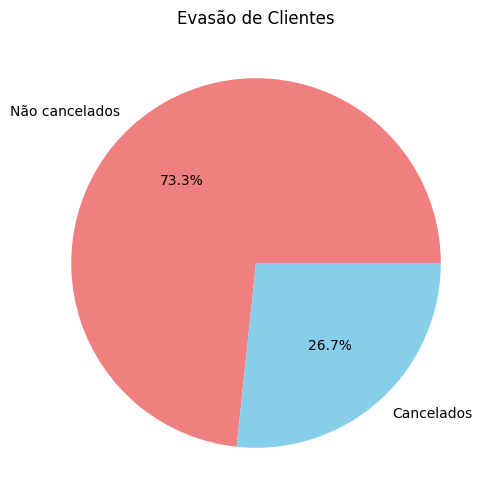

In [109]:
#Dados a serem usados no gráfico
dados_evasão = dados['Cancelado'].value_counts(normalize=True)

#Cores do gráfico
cores_grafico_evasao = ['lightcoral', 'skyblue']

# Plotando Gráfico
label = ['Não cancelados','Cancelados']
plt.figure(figsize=(10,6))
plt.pie(dados_evasão, labels=label, autopct='%1.1f%%', colors=cores_grafico_evasao)
plt.title('Evasão de Clientes')
plt.show()

In [103]:
dados.head()

,ID_Cliente,Cancelado,Gênero,idoso,Parceiro,Dependentes,Meses_Contrato,Serviço_Telefone,Mutiplas_Linhas,Provedor_Internet,...,Suporte_Técnico,Tv_a_cabo,Streaming_Filmes,Tipo_Contrato,Fatura_Online,Tipo_Pagamento,Gasto_Mensal,Gasto_Total,Contas_Diarias,Cancelado_numerico
0,0002-ORFBO,Não,Feminino,Não,Sim,Sim,9,Sim,Não,DSL,...,Sim,Sim,Não,Um ano,Sim,Cheque por correio,65.6,593.30,2.186667,0
1,0003-MKNFE,Não,Masculino,Não,Não,Não,9,Sim,Sim,DSL,...,Não,Não,Sim,Mês a mês,Não,Cheque por correio,59.9,542.40,1.996667,0
2,0004-TLHLJ,Sim,Masculino,Não,Não,Não,4,Sim,Não,Fibra ótica,...,Não,Não,Não,Mês a mês,Sim,Cheque eletrônico,73.9,280.85,2.463333,1
3,0011-IGKFF,Sim,Masculino,Sim,Sim,Não,13,Sim,Não,Fibra ótica,...,Não,Sim,Sim,Mês a mês,Sim,Cheque eletrônico,98.0,1237.85,3.266667,1
4,0013-EXCHZ,Sim,Feminino,Sim,Sim,Não,3,Sim,Não,Fibra ótica,...,Sim,Sim,Não,Mês a mês,Sim,Cheque por correio,83.9,267.40,2.796667,1


/tmp/ipython-input-3914248673.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dados, x=coluna,palette='deep')


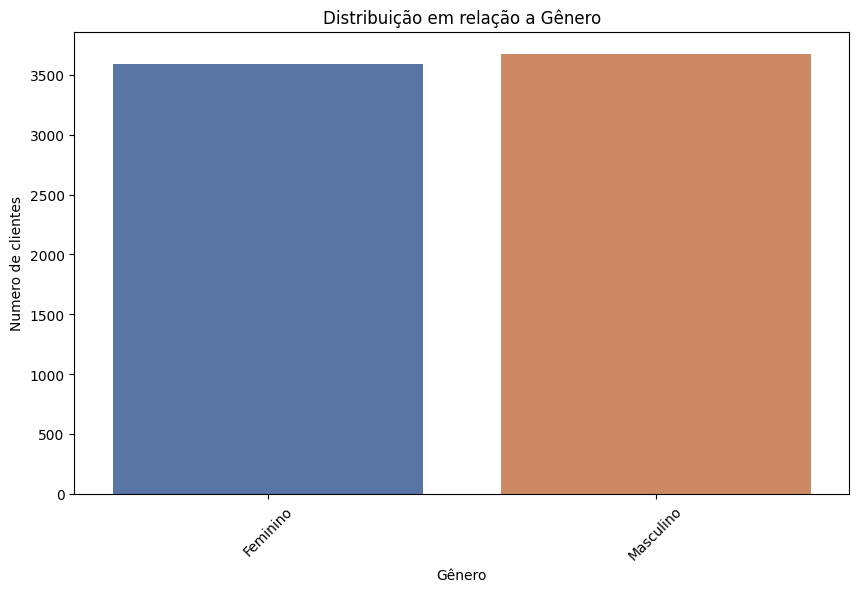

/tmp/ipython-input-3914248673.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dados, x=coluna,palette='deep')


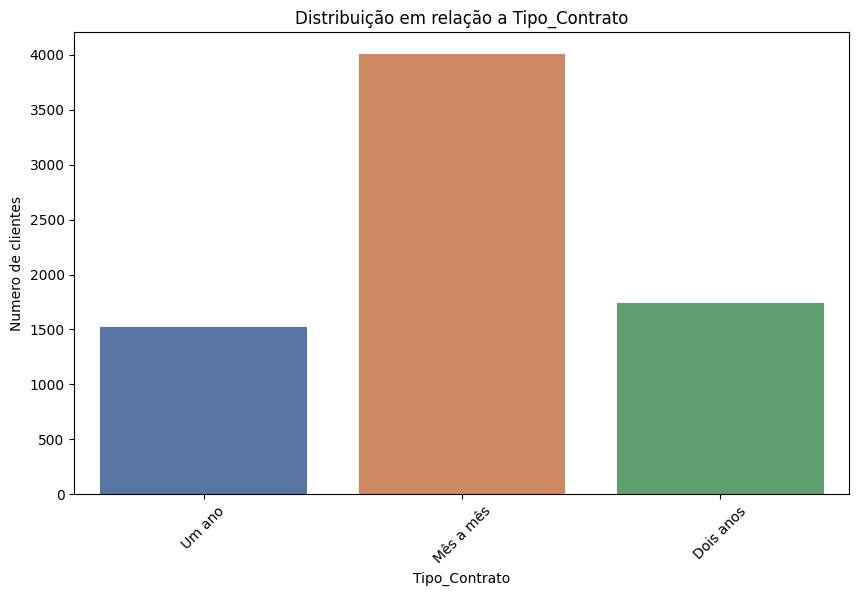

/tmp/ipython-input-3914248673.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dados, x=coluna,palette='deep')


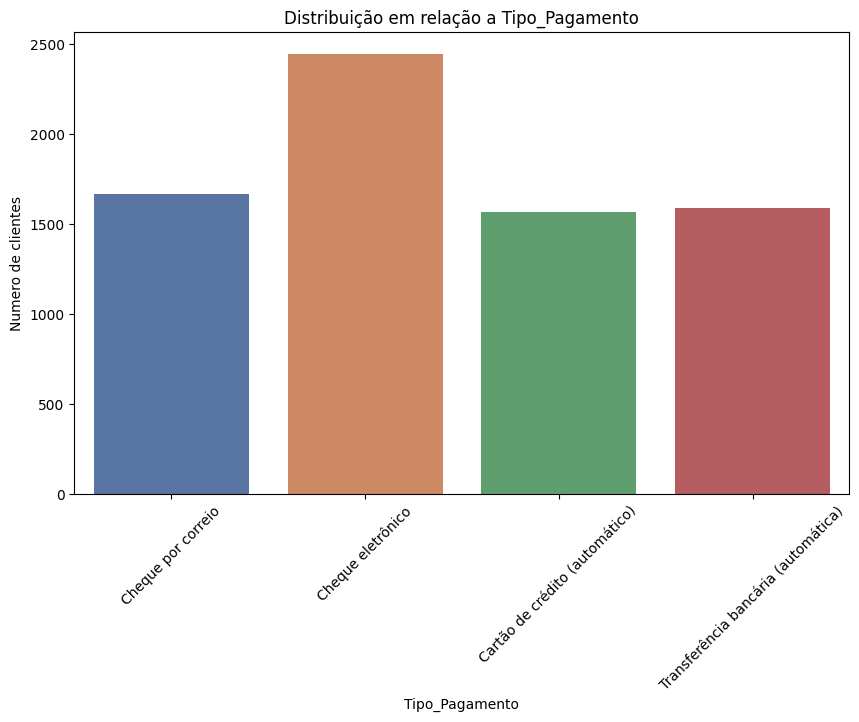

/tmp/ipython-input-3914248673.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dados, x=coluna,palette='deep')


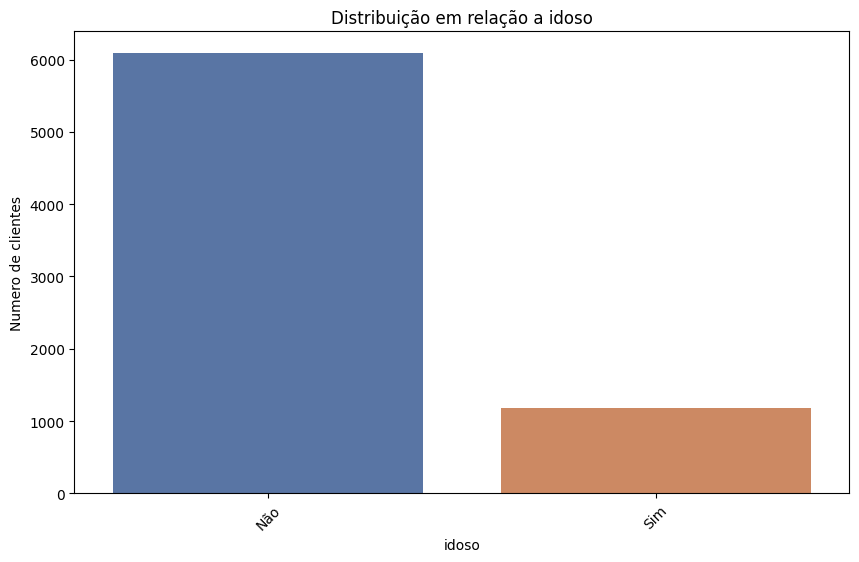

/tmp/ipython-input-3914248673.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dados, x=coluna,palette='deep')


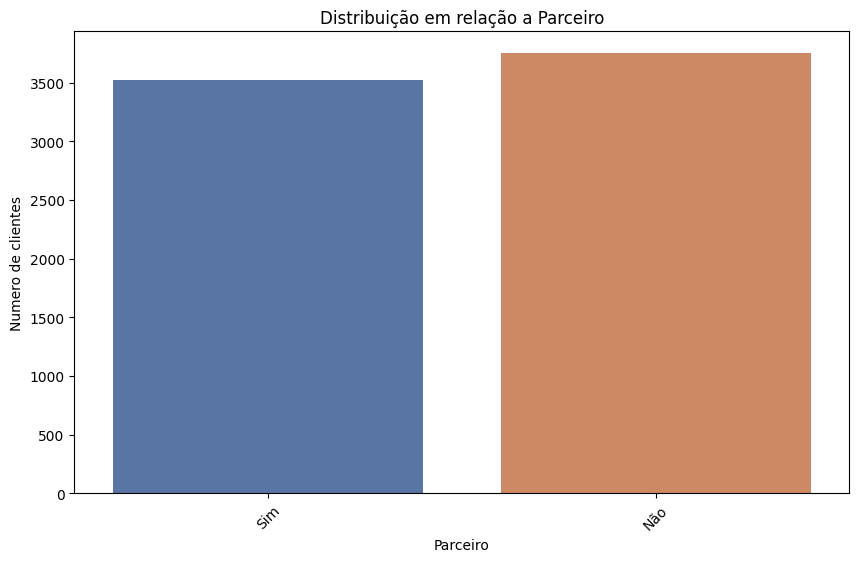

/tmp/ipython-input-3914248673.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dados, x=coluna,palette='deep')


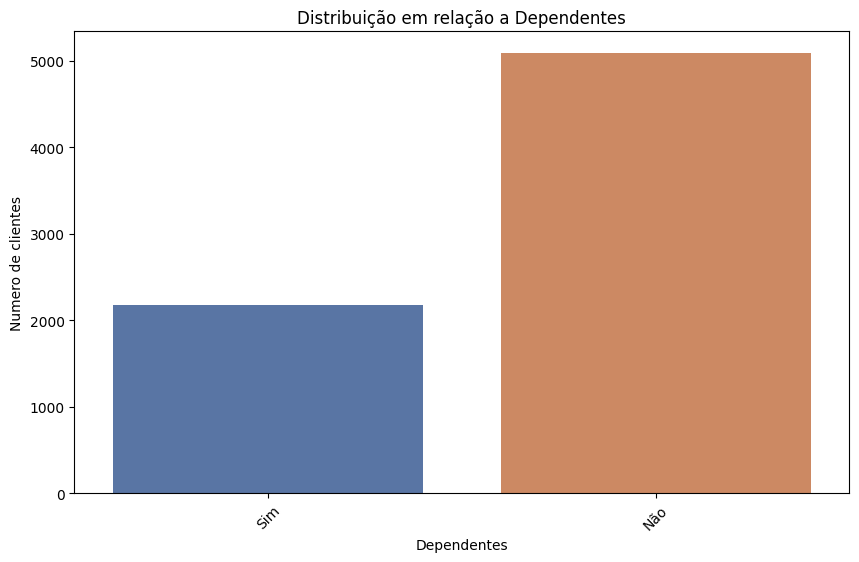

/tmp/ipython-input-3914248673.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dados, x=coluna,palette='deep')


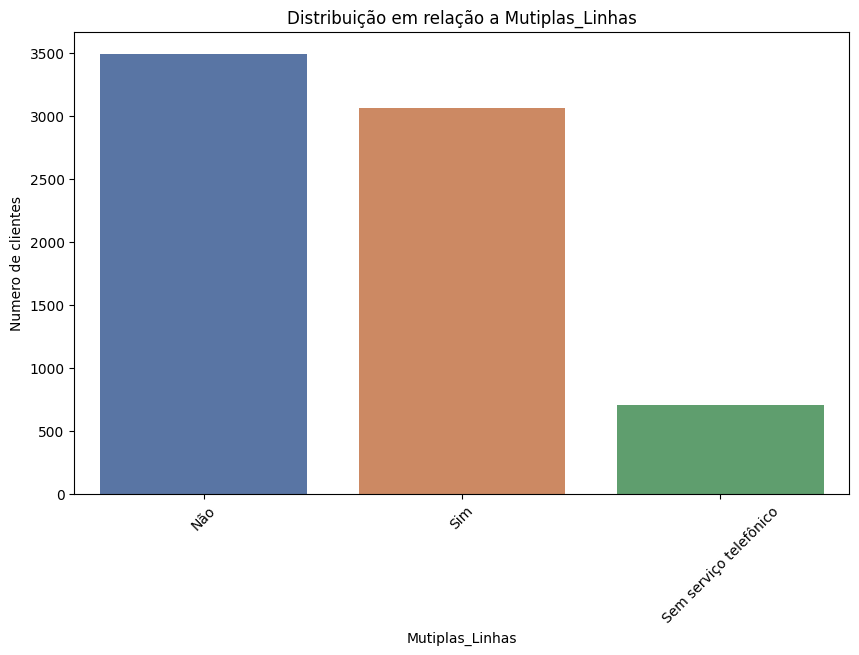

/tmp/ipython-input-3914248673.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dados, x=coluna,palette='deep')


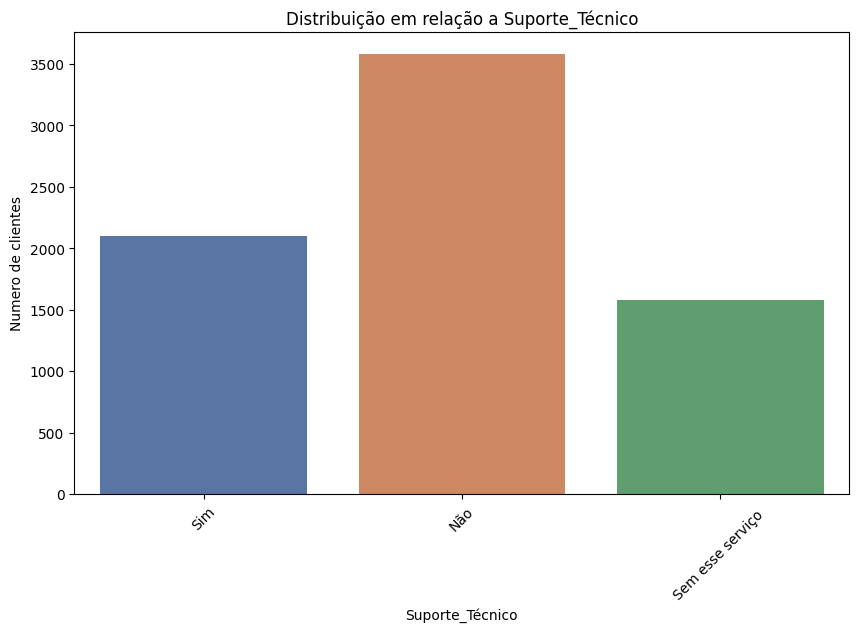

/tmp/ipython-input-3914248673.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dados, x=coluna,palette='deep')


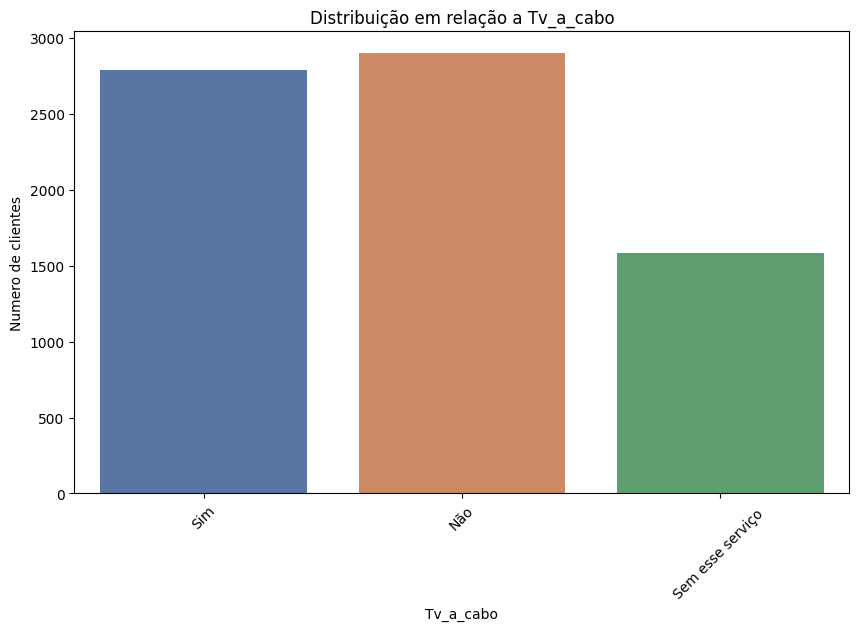

/tmp/ipython-input-3914248673.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dados, x=coluna,palette='deep')


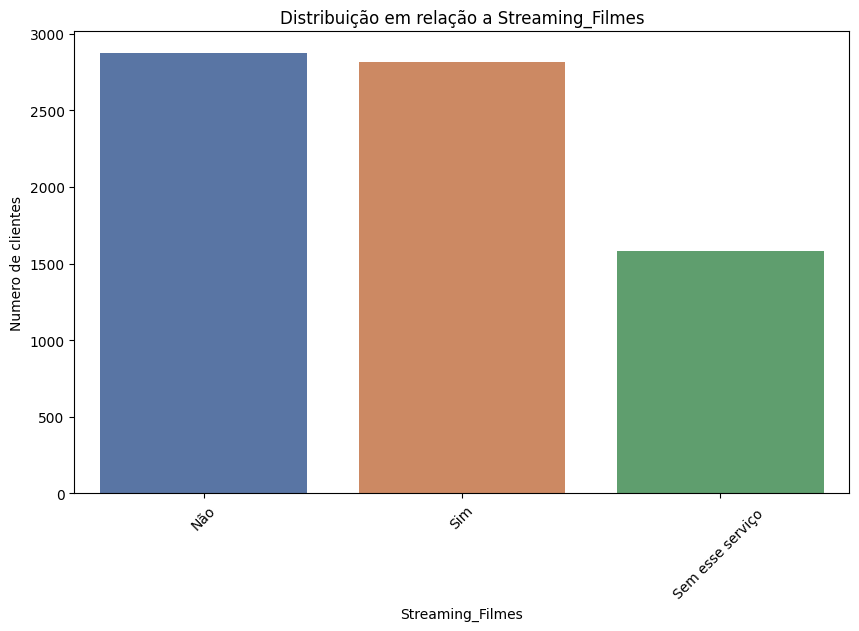

/tmp/ipython-input-3914248673.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dados, x=coluna,palette='deep')


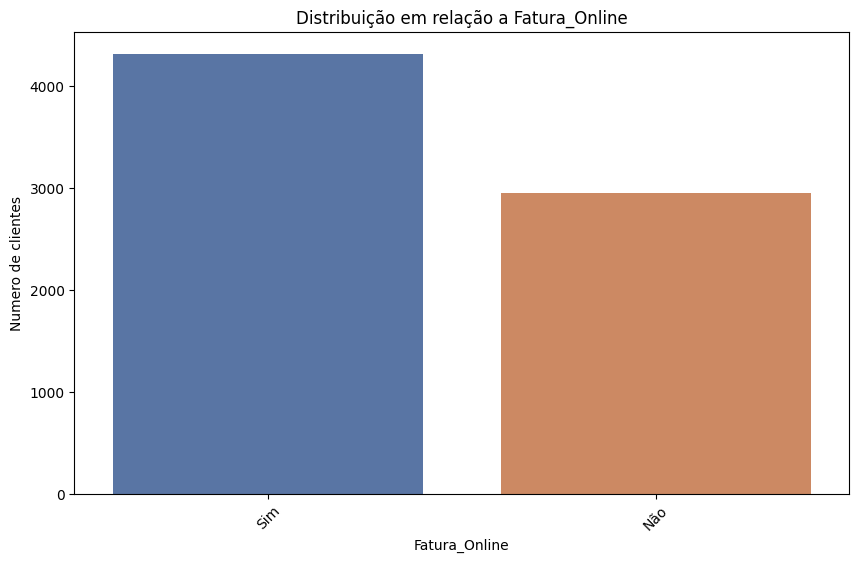

In [104]:
#Variavel com as colunas a serem plotados em gráfico
variaveis_categoricas = ['Gênero','Tipo_Contrato','Tipo_Pagamento','idoso','Parceiro','Dependentes','Mutiplas_Linhas','Suporte_Técnico','Tv_a_cabo','Streaming_Filmes','Fatura_Online']

# Plotando Gráfico
for coluna in variaveis_categoricas:
  plt.figure(figsize=(10,6))
  sns.countplot(data=dados, x=coluna,palette='deep')
  plt.title(f'Distribuição em relação a {coluna}')
  plt.xlabel(coluna)
  plt.ylabel('Numero de clientes')
  plt.xticks(rotation=45)
  plt.show()

In [105]:
# Calculando a média de cancelamento de acorto com o tempo contrato
relacao_meses_cancelamento = dados.groupby('Meses_Contrato')['Cancelado_numerico'].mean()


In [106]:
relacao_meses_cancelamento

,Cancelado_numerico
Meses_Contrato,
0,0.000000
1,0.610410
2,0.504065
3,0.463768
4,0.459459
...,...
68,0.096154
69,0.100000
70,0.090164


In [107]:
import plotly.express as px

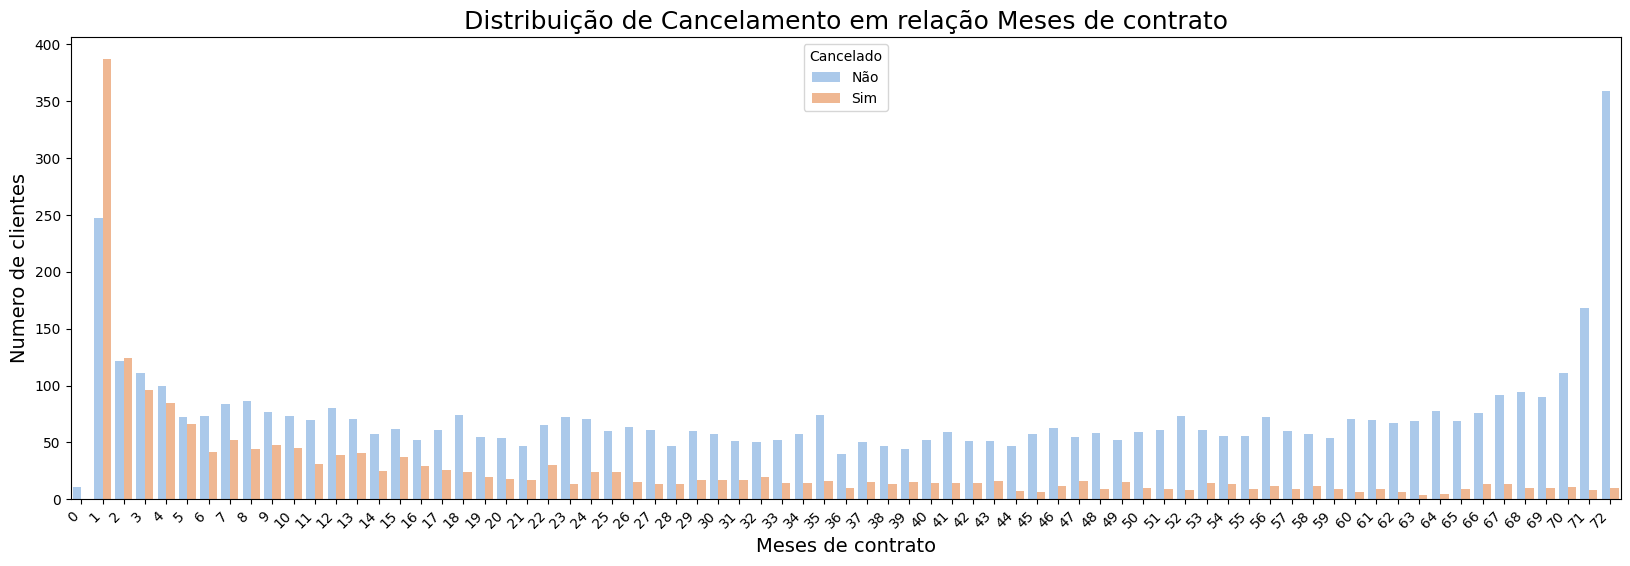

In [108]:
#Plotando gráfico: Meses_Contrato x Cancelamento
plt.figure(figsize=(20,6))
sns.countplot(data=dados, x=dados['Meses_Contrato'],hue='Cancelado',palette='pastel')
plt.title('Distribuição de Cancelamento em relação Meses de contrato',fontsize=18)
plt.xlabel('Meses de contrato',fontsize=14)
plt.ylabel('Numero de clientes',fontsize=14)
plt.xticks(rotation=45,ha='right')
plt.legend(title='Cancelado')
plt.show()

##**Relatório: Análise de evasão de Clientes**

# Introdução
- Este relatório apresenta a análise realizada com base nos dados de evasão de clientes da empresa Telecom X, com o objetivo de melhorar o desempenho da empresa.

# Limpeza e tretamento de dados
- No início da análise, foi feita a importação dos dados da empresa, a partir de um dataframe no formato de um arquivo JSON. Após isso, realizou-se o tratamento dos dados, iniciando pela normalização das colunas, seguida pelas seguintes etapas:
 - Conversão do tipo de coluna (dtype);
 - Verificação de dados nulos ou duplicados;
 - Tratamento das colunas que continham dados nulos;
 - Tradução dos nomes e valores do dataframe.

# Análise Exploratória de Dados
- Os dados do dataframe foram analisados desde a fase de tratamento, mas principalmente por meio de gráficos, que trouxeram uma compreensão mais clara das informações.

- Com os resultados, observa-se uma grande evasão de clientes e como ela se relaciona com as outras variáveis do dataframe.

- Fica evidente que, no primeiro ano de contrato (primeiros 12 meses), há uma quantidade mais elevada de cancelamentos por parte dos clientes. Além disso, fatores como a qualidade da conexão do serviço também influenciam significativamente a decisão de cancelamento.

# Conclusões e Insights
- Conclui-se que a evasão de clientes não é um fator isolado, mas sim o resultado da interação de múltiplas variáveis, conforme identificado na análise. Os cancelamentos sofrem maior influência de fatores como:
 - Tempo reduzido de contrato;
 -Tipo de provedor de internet (variável que impacta diretamente a qualidade do serviço, como a estabilidade da conexão).

# Recomendações
- Com base na análise, recomenda-se as seguintes ações para reduzir o cancelamento de clientes:
 - Maior atratividade: Criar promoções, ofertas ou programas de fidelidade para reter os clientes.
 - Pesquisa de satisfação: Realizar pesquisas periódicas para avaliar a satisfação dos clientes em relação à qualidade do serviço oferecido.
 - Atrativos personalizados: Identificar o perfil dos clientes e oferecer benefícios alinhados às suas necessidades e preferências.



